In [2]:
import sys
sys.path.append('..')

import datetime
import torch
import pytorch_lightning as pl
# from ct.model.ct_apy import CT_aPY
from ct.model.resnet_apy import ResNet_aPY_torch, ResNet_aPY
from ct.data.apy import aPY

In [5]:
apy = aPY(batch_size=32, data_path='../data')
model = ResNet_aPY()

if torch.cuda.is_available():
  print('using gpu')
  accelerator = 'gpu'
else:
  accelerator = None

trainer = pl.Trainer(max_epochs=10, logger=None, accelerator=accelerator, devices=1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


using gpu


In [6]:
trainer.fit(model=model, datamodule=apy)

/opt/conda/envs/dd2412/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:604: UserWarning: Checkpoint directory /home/monhart.jakub/dd2412-project/notebooks/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | model          | ResNet_aPY_torch   | 23.5 M
1 | train_accuracy | MulticlassAccuracy | 0     
2 | val_accuracy   | MulticlassAccuracy | 0     
------------------------------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
94.196    Total estimated model params size (MB)


Epoch 9: 100%|██████████| 198/198 [01:17<00:00,  2.54it/s, loss=0.558, train_acc=0.750, val_acc=0.618]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 198/198 [01:18<00:00,  2.52it/s, loss=0.558, train_acc=0.750, val_acc=0.618]


In [7]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6)


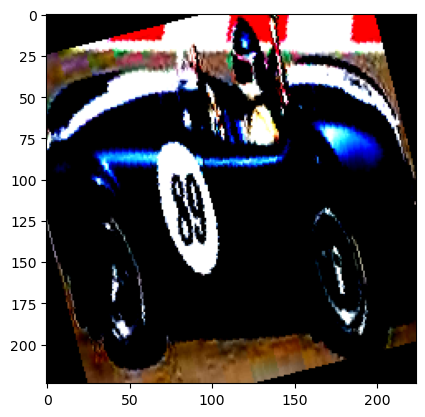

In [12]:
apy.setup()
img, (y, _) = apy.train[102]
print(y)
model.model(img[None, ...])[0].argmax()
plt.imshow(img.permute(1,2,0))

tensor(6)

In [10]:
vc = apy.train.dataset.train_df['class'].value_counts()
weights = [0]*len(vc)
class2id = apy.train.dataset.class2id

In [13]:
for c in list(class2id.keys())[:20]:
  weights[class2id[c]] = vc[c]

In [24]:
weights = torch.tensor(weights)
weights = 1 / weights
# torch.tensor(sum(weights) / )

/tmp/ipykernel_12315/993776609.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights = torch.tensor(weights)


In [29]:
weights / weights.sum()

tensor(1.)

In [28]:
weights.sum()

tensor(0.1215)

# Check dataset

In [31]:
import matplotlib.pyplot as plt

In [37]:
apy.setup()
train = apy.train_dataloader()
class2id = apy.train.dataset.class2id
for img, (c, _) in train:
  break

In [38]:
id2class = [None]*len(class2id)
for k in class2id.keys():
  id2class[class2id[k]] = k

person


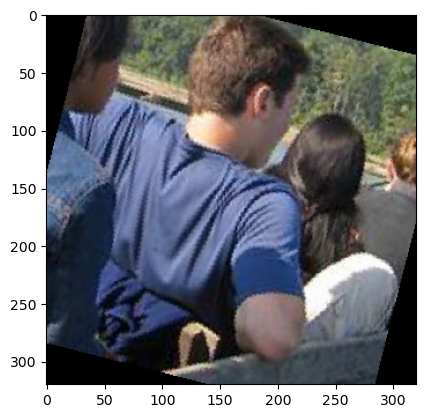

In [55]:
idx = 14
print(id2class[c[idx]])
plt.imshow(img[idx].permute(1,2,0))